# Exploration on IM.DB dataset

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
from sqlite3 import connect
import matplotlib.pyplot as plt
%matplotlib inline

conn = connect('../data/im.db')

In [57]:
cur = conn.cursor()

In [58]:
# Fetch the result and store it in table_names
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

## Join multiple tables to have one single view

In [59]:
# read the dataset into a data frame
new_Table = pd.read_sql('''
            SELECT *
            FROM movie_basics
            JOIN movie_ratings
                USING ('movie_id')           
            ''', conn)

new_Table.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [60]:
# Check sum of NaN in data set
new_Table.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [61]:
# describe and check data set info

new_Table.info(), new_Table.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


(None,
          start_year  runtime_minutes  averagerating      numvotes
 count  73856.000000     66236.000000   73856.000000  7.385600e+04
 mean    2014.276132        94.654040       6.332729  3.523662e+03
 std        2.614807       208.574111       1.474978  3.029402e+04
 min     2010.000000         3.000000       1.000000  5.000000e+00
 25%     2012.000000        81.000000       5.500000  1.400000e+01
 50%     2014.000000        91.000000       6.500000  4.900000e+01
 75%     2016.000000       104.000000       7.400000  2.820000e+02
 max     2019.000000     51420.000000      10.000000  1.841066e+06)

### The ***Mean*** is approximately the value of the ***Median*** which means the distribution normal ; Gaussian.
#### There are approximately three deviation away from the mean

In [62]:
new_Table.genres.dropna()

0          Action,Crime,Drama
1             Biography,Drama
2                       Drama
3                Comedy,Drama
4        Comedy,Drama,Fantasy
                 ...         
73850             Documentary
73851             Documentary
73852            Drama,Family
73853             Documentary
73855             Documentary
Name: genres, Length: 73052, dtype: object

<Axes: xlabel='genres', ylabel='averagerating'>

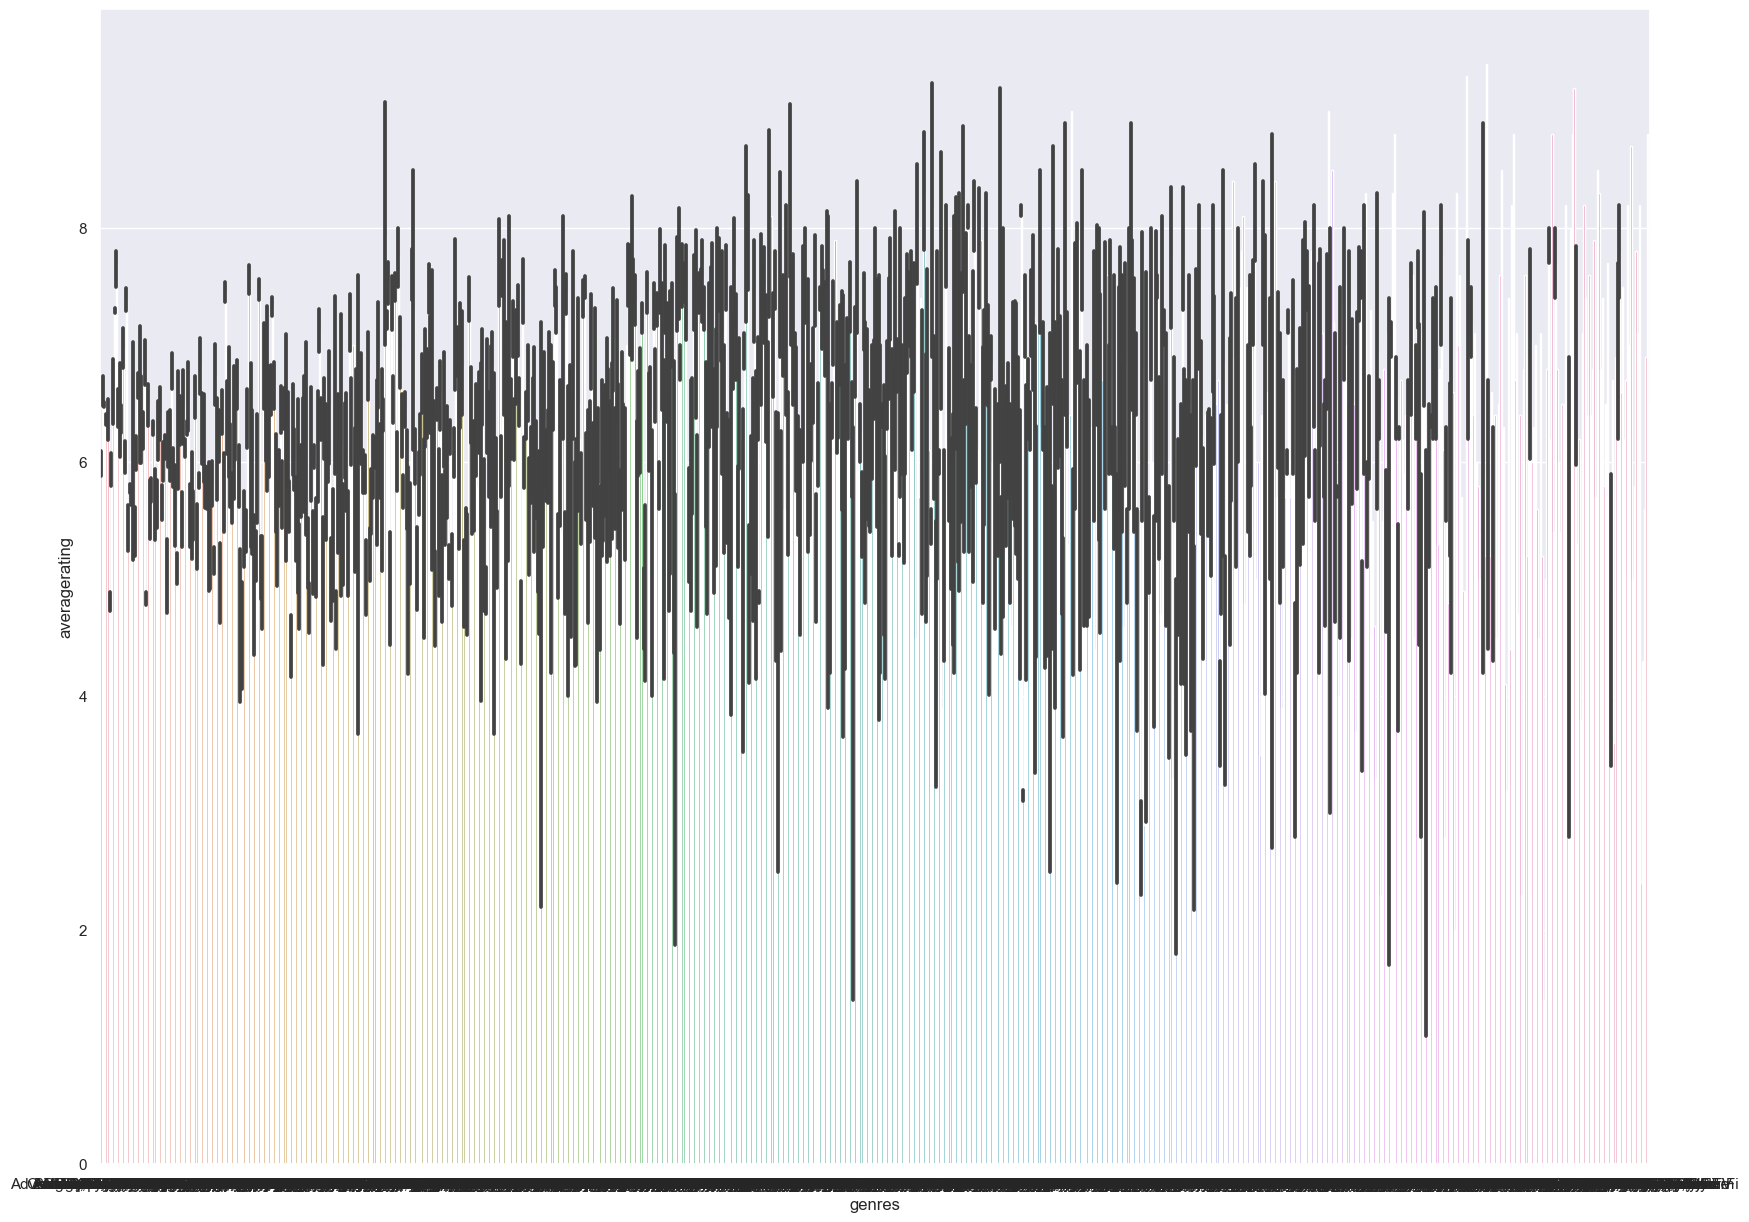

In [83]:
sns.barplot(new_Table, x=new_Table['genres'], y=new_Table['averagerating'])


In [78]:
new_Table.genres.unique()

array(['Action,Crime,Drama', 'Biography,Drama', 'Drama', 'Comedy,Drama',
       'Comedy,Drama,Fantasy', 'Horror,Thriller',
       'Adventure,Animation,Comedy', 'History', 'Documentary',
       'Animation,Drama,History', 'Drama,Mystery',
       'Action,Animation,Comedy', 'Crime,Drama', None,
       'Biography,Comedy,Drama', 'Action,Drama', 'Documentary,History',
       'Sci-Fi', 'Comedy', 'Thriller', 'Adventure,Animation,Sci-Fi',
       'Drama,Horror', 'Drama,Mystery,Thriller', 'Drama,Family',
       'Adventure,Comedy,Romance', 'Adventure,Drama,Romance',
       'Comedy,Crime,Drama', 'Biography', 'Horror',
       'Adventure,Comedy,Drama', 'Drama,Sci-Fi,Thriller', 'Action',
       'Comedy,Drama,Romance', 'Action,Adventure,Sci-Fi', 'Comedy,Family',
       'Adventure', 'Drama,History,War', 'Action,Thriller',
       'Comedy,Crime', 'Crime,Drama,Thriller', 'Action,Sci-Fi,Thriller',
       'Fantasy', 'Drama,Mystery,Sci-Fi', 'Biography,Drama,History',
       'Action,Comedy,Crime', 'Action,Adven

In [74]:
new_Table[new_Table.averagerating > 6].head(8)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [84]:
new_Table[new_Table.averagerating > 6].tail(8)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
73848,tt9910930,Jeg ser deg,Jeg ser deg,2019,75.0,"Crime,Documentary",6.1,7
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5
73855,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11
